# Ghost Rays Analysis
# New blockers for 7-shell module
## Milo Buitrago-Casas
## May, 2018

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
import matplotlib 
from astropy.io import fits
import ast
import matplotlib.patches as patches
import astropy.units as u
import skimage.transform

/Users/Kamilobu/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Scale

In [2]:
CCD_PIXEL_PITCH = 13.5 * u.micron
binning = 2.
distance = 2. * u.m
s = np.arctan(binning * CCD_PIXEL_PITCH / distance).to(u.arcmin)
resol = 1024
Dwidth=8.25/s.value #detector width in pixels
Flux_X4_low, Flux_X4_up = [], []
Flux_X1_low, Flux_X1_up = [], []
power = np.array([0.85,0.65,0.5,0.3,0.1,0.03])/0.03
offaxis = [30.,26.,22.,18.,14.,10.]

### Defining Transparent Color Map:

In [3]:
tred = {'red' :  ((0.0, 0.0, 0.29), 
                  (1.0, 0.29, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                  (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.57), 
                  (1.0, 0.57, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                  (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.1), 
                    (1.0, 0.1, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                  (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.1), 
                  (1.0, 0.1, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                  (1.0, 1.0, 0.0))}

tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 

### Defining Funtion to get circular mask:

In [4]:
def createCircularMask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

# 30 arcmin

In [5]:
'''Scale and Center Parameters'''
X, Y = 0., -30.
X0, Y0 = 450, 78 ## Calib Sep 2017
X1, Y1 = 437, 224 ## Calib Mar 2018
angle0 = 0.0
angle1 = 0.0

## X4 7-Shell Alone 

In [6]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/500GB/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/500GB/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym30 = fits.open('/Volumes/500GB/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p85mA_0arcminX_-30arcminY.fits')
DX4_X0_Ym30 = np.average(FX4_X0_Ym30[0].data, axis=0)
DX4_X0_Ym30 = skimage.transform.rotate(((DX4_X0_Ym30-X4Darks)/(DX4_X0_Ym30-X4Darks).max()),angle0,center=(X0,Y0))

## X1 7-Shell - New Blockers

In [7]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/500GB/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks1_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/500GB/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks2_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym30 = fits.open('/Volumes/500GB/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/GhostRays_X1_NewBlockers/FOXSI3_X1_NewBlockers_CCD_T9Sx6_30kV_0p85mA_0arcminX_-30arcminY.fits')
CD_X0_Ym30 = np.average(CF_Xm0_Ym30[0].data, axis=0)
DX1_X0_Ym30 = skimage.transform.rotate(((CD_X0_Ym30-DarksC)/(CD_X0_Ym30-DarksC).max()),angle1,center=(X1,Y1))

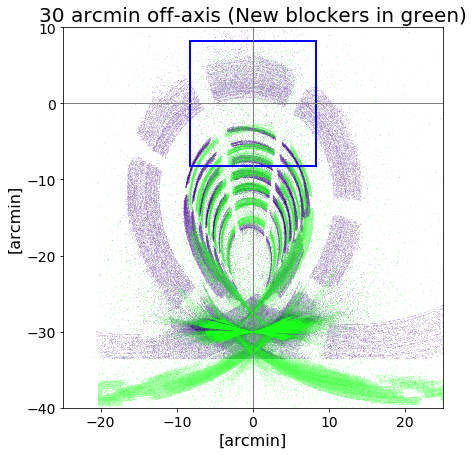

In [8]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym30, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX1_X0_Ym30, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-8.25,-8.25),16.5,16.5,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-11.667),16.5,16.5,linewidth=2,edgecolor='b',facecolor='none',angle=45)
#ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('30 arcmin off-axis (New blockers in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [9]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym30[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X1_low.append(DX1_X0_Ym30[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [10]:
# whitout collimator:
h, w = DX4_X0_Ym30.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym30.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX1_X0_Ym30.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX1_X0_Ym30.copy()
masked_imgC[~maskC] = 0
Flux_X1_up.append(masked_imgC.sum())

# 26 arcmin

In [11]:
'''Scale and Center Parameters'''
X, Y = 0., -26.
X0, Y0 = 445, 80 ## Calib Sep 2017
X1, Y1 = 438,226  ## Calib Mar 2018
angle0 = 0.0
angle1 = 0.0

### 7-Shell Alone

In [12]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym26 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p65mA_0arcminX_-26arcminY.fits')
DX4_X0_Ym26 = np.average(FX4_X0_Ym26[0].data, axis=0)
DX4_X0_Ym26 = skimage.transform.rotate(((DX4_X0_Ym26-X4Darks)/(DX4_X0_Ym26-X4Darks).max()),angle0,center=(X0,Y0))

### X1 7-Shell + New blockers

In [13]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks1_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks2_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym26 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/GhostRays_X1_NewBlockers/FOXSI3_X1_NewBlockers_CCD_T9Sx6_30kV_0p65mA_0arcminX_-26arcminY.fits')
CD_X0_Ym26 = np.average(CF_Xm0_Ym26[0].data, axis=0)
DX1_X0_Ym26 = skimage.transform.rotate(((CD_X0_Ym26-DarksC)/(CD_X0_Ym26-DarksC).max()),angle1,center=(X1,Y1))



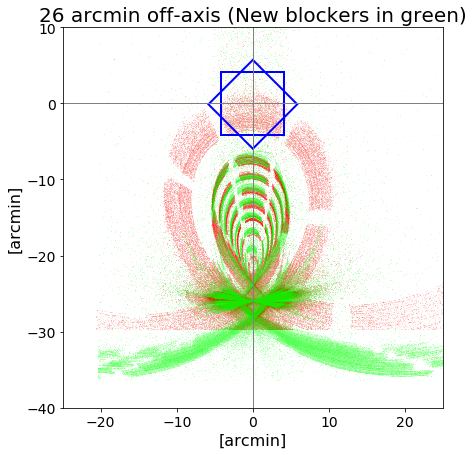

In [14]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym26, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX1_X0_Ym26, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('26 arcmin off-axis (New blockers in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [15]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym26[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X1_low.append(DX1_X0_Ym26[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [16]:
# whitout collimator:
h, w = DX4_X0_Ym26.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym26.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX1_X0_Ym26.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX1_X0_Ym26.copy()
masked_imgC[~maskC] = 0
Flux_X1_up.append(masked_imgC.sum())

# 22 arcmin

In [17]:
'''Scale and Center Parameters'''
X, Y = 0., -22.
X0, Y0 = 450, 82 ## Calib Sep 2017
X1, Y1 = 439, 228 ## Calib Mar 2018
angle0 = 0.0
angle1 = 0.0

### X4 7-Shell Alone

In [18]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym22 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p5mA_0arcminX_-22arcminY.fits')
DX4_X0_Ym22 = np.average(FX4_X0_Ym22[0].data, axis=0)
DX4_X0_Ym22 = skimage.transform.rotate(((DX4_X0_Ym22-X4Darks)/(DX4_X0_Ym22-X4Darks).max()),angle0,center=(X0,Y0))

### X1 7-Shell + New blockers

In [19]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks1_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks2_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym22 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/GhostRays_X1_NewBlockers/FOXSI3_X1_NewBlockers_CCD_T9Sx6_30kV_0p5mA_0arcminX_-22arcminY.fits')
CD_X0_Ym22 = np.average(CF_Xm0_Ym22[0].data, axis=0)
DX1_X0_Ym22 = skimage.transform.rotate(((CD_X0_Ym22-DarksC)/(CD_X0_Ym22-DarksC).max()),angle1,center=(X1,Y1))


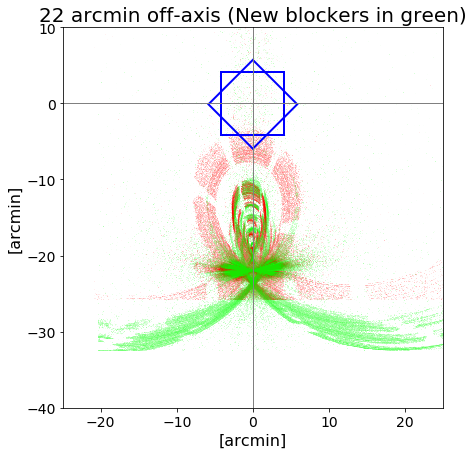

In [20]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym22, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX1_X0_Ym22, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('22 arcmin off-axis (New blockers in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [21]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym22[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X1_low.append(DX1_X0_Ym22[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [22]:
# whitout collimator:
h, w = DX4_X0_Ym22.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym22.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX1_X0_Ym22.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX1_X0_Ym22.copy()
masked_imgC[~maskC] = 0
Flux_X1_up.append(masked_imgC.sum())

# 18 arcmin

In [23]:
'''Scale and Center Parameters'''
X, Y = 0., -18.
X0, Y0 = 450, 82 ## Calib Sep 2017
X1, Y1 = 439, 229 ## Calib Mar 2018
angle0 = 0.0
angle1 = 0.0

### X4 7-Shell Alone

In [24]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym18 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p3mA_0arcminX_-18arcminY.fits')
DX4_X0_Ym18 = np.average(FX4_X0_Ym18[0].data, axis=0)
DX4_X0_Ym18 = skimage.transform.rotate(((DX4_X0_Ym18-X4Darks)/(DX4_X0_Ym18-X4Darks).max()),angle0,center=(X0,Y0))

### X1 7-Shell + New blockers

In [25]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks1_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks2_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym18 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/GhostRays_X1_NewBlockers/FOXSI3_X1_NewBlockers_CCD_T9Sx6_30kV_0p3mA_0arcminX_-18arcminY.fits')
CD_X0_Ym18 = np.average(CF_Xm0_Ym18[0].data, axis=0)
DX1_X0_Ym18 = skimage.transform.rotate(((CD_X0_Ym18-DarksC)/(CD_X0_Ym18-DarksC).max()),angle1,center=(X1,Y1))


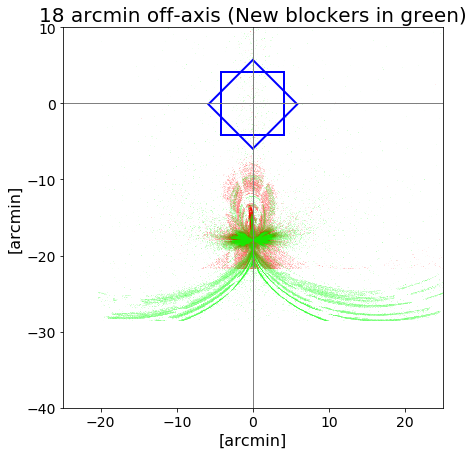

In [26]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym18, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX1_X0_Ym18, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('18 arcmin off-axis (New blockers in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [27]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym18[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X1_low.append(DX1_X0_Ym18[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [28]:
# whitout collimator:
h, w = DX4_X0_Ym18.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym18.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX1_X0_Ym18.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX1_X0_Ym18.copy()
masked_imgC[~maskC] = 0
Flux_X1_up.append(masked_imgC.sum())

# 14 arcmin

In [29]:
'''Scale and Center Parameters'''
X, Y = 0., -14.
X0, Y0 = 449, 86 ## Calib Sep 2017
X1, Y1 = 438, 231 ## Calib Mar 2018
angle0 = 0.0
angle1 = 0.0

### X4 7-Shell Alone

In [30]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym14 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p1mA_0arcminX_-14arcminY.fits')
DX4_X0_Ym14 = np.average(FX4_X0_Ym14[0].data, axis=0)
DX4_X0_Ym14 = skimage.transform.rotate(((DX4_X0_Ym14-X4Darks)/(DX4_X0_Ym14-X4Darks).max()),angle0,center=(X0,Y0))

### X1 7-Shell + New Blockers

In [31]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks1_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks2_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym14 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/GhostRays_X1_NewBlockers/FOXSI3_X1_NewBlockers_CCD_T9Sx6_30kV_0p1mA_0arcminX_-14arcminY.fits')
CD_X0_Ym14 = np.average(CF_Xm0_Ym14[0].data, axis=0)
DX1_X0_Ym14 = skimage.transform.rotate(((CD_X0_Ym14-DarksC)/(CD_X0_Ym14-DarksC).max()),angle1,center=(X1,Y1))


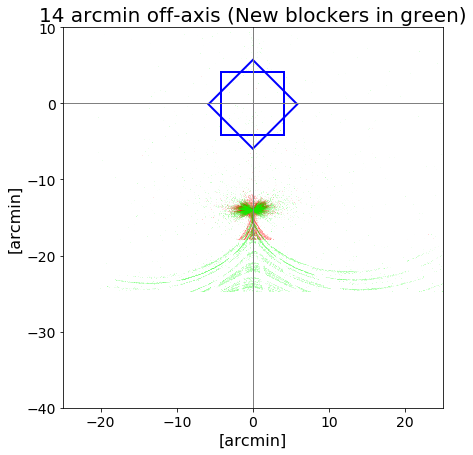

In [32]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym14, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX1_X0_Ym14, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('14 arcmin off-axis (New blockers in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [33]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym14[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X1_low.append(DX1_X0_Ym14[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [34]:
# whitout collimator:
h, w = DX4_X0_Ym14.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym14.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX1_X0_Ym14.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX1_X0_Ym14.copy()
masked_imgC[~maskC] = 0
Flux_X1_up.append(masked_imgC.sum())

# 10 arcmin

In [35]:
'''Scale and Center Parameters'''
X, Y = 0., -10.
X0, Y0 = 448, 88 ## Calib Sep 2017
X1, Y1 = 439, 233 ## Calib Mar 2018
angle0 = 0.0
angle1 = 0.0

### X4 7-Shell Alone

In [36]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym10 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p03mA_0arcminX_-10arcminY.fits')
DX4_X0_Ym10 = np.average(FX4_X0_Ym10[0].data, axis=0)
DX4_X0_Ym10 = skimage.transform.rotate(((DX4_X0_Ym10-X4Darks)/(DX4_X0_Ym10-X4Darks).max()),angle0,center=(X0,Y0))

### X1 7-Shell + New Blockers

In [37]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks1_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/Darks_X1_NewBlockers/Darks2_FOXSI3_X1_NewBlockers_CCD_T9Sx6_10kV_0p02mA_+6p4arcminX_-6p4arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym10 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X1-7Shells_NewBlockers/CCD/GhostRays_X1_NewBlockers/FOXSI3_X1_NewBlockers_CCD_T9Sx6_30kV_0p03mA_0arcminX_-10arcminY.fits')
CD_X0_Ym10 = np.average(CF_Xm0_Ym10[0].data, axis=0)
DX1_X0_Ym10 = skimage.transform.rotate(((CD_X0_Ym10-DarksC)/(CD_X0_Ym10-DarksC).max()),angle1,center=(X1,Y1))


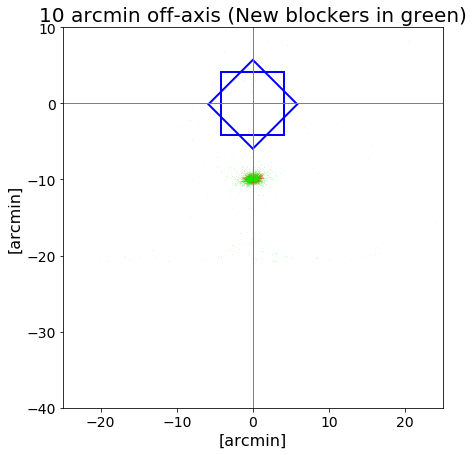

In [38]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym10, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX1_X0_Ym10, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('10 arcmin off-axis (New blockers in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [39]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym10[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X1_low.append(DX1_X0_Ym10[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [40]:
# whitout collimator:
h, w = DX4_X0_Ym10.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym10.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX1_X0_Ym10.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX1_X0_Ym10.copy()
masked_imgC[~maskC] = 0
Flux_X1_up.append(masked_imgC.sum())

# Getting the flux inside the detector

Text(0.5,1,'Ghost Rays X4(7Shell)-Old-Bks vs. X1(7Shell)-New-Bks')

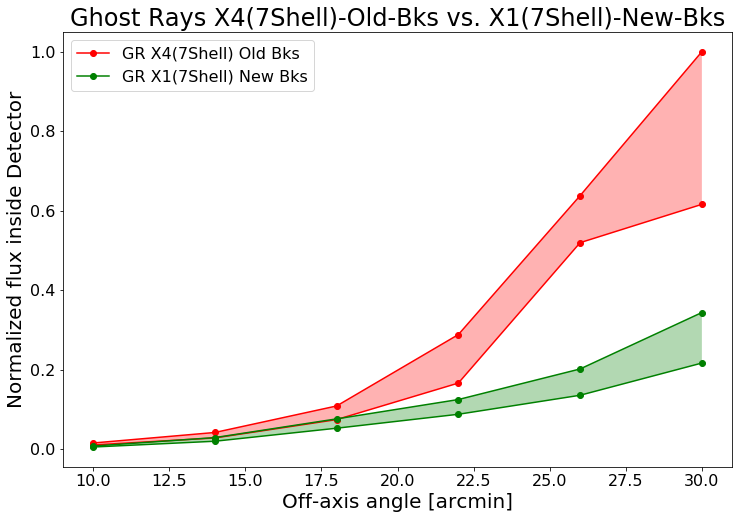

In [41]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,Flux_X4_up/max(Flux_X4_up),'o-',c='r',label='GR X4(7Shell) Old Bks')
plt.fill_between(offaxis,Flux_X4_up/max(Flux_X4_up),Flux_X4_low/max(Flux_X4_up),
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,Flux_X4_low/max(Flux_X4_up),'o-',c='r')
plt.plot(offaxis,Flux_X1_up/max(Flux_X4_up),'o-',c='g',label='GR X1(7Shell) New Bks')
plt.fill_between(offaxis,Flux_X1_up/max(Flux_X4_up),Flux_X1_low/max(Flux_X4_up),
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,Flux_X1_low/max(Flux_X4_up),'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Normalized flux inside Detector',fontsize=20)
plt.title('Ghost Rays X4(7Shell)-Old-Bks vs. X1(7Shell)-New-Bks',fontsize=24)

# Correcting by the source power:

(-0.1, 6.1)

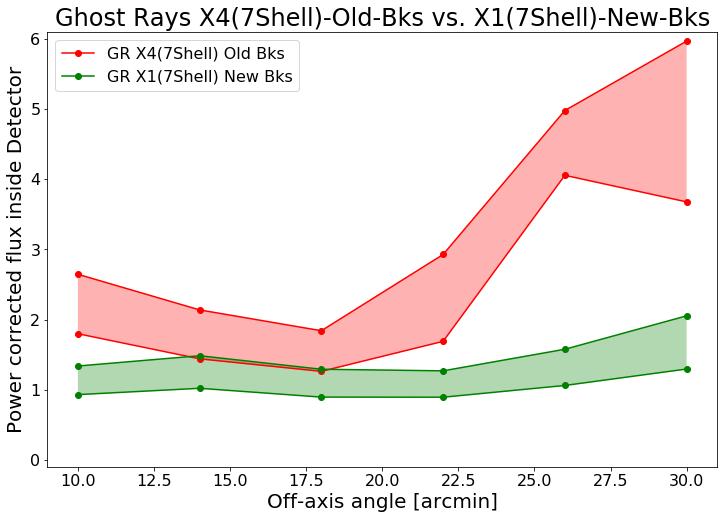

In [42]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,np.array(Flux_X4_up)/power,'o-',c='r',label='GR X4(7Shell) Old Bks')
plt.fill_between(offaxis,np.array(Flux_X4_up)/power,
                 np.array(Flux_X4_low)/power,
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X4_low)/power,'o-',c='r')
plt.plot(offaxis,np.array(Flux_X1_up)/power,'o-',c='g',label='GR X1(7Shell) New Bks')
plt.fill_between(offaxis,np.array(Flux_X1_up)/power,
                 np.array(Flux_X1_low)/power,
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X1_low)/power,'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Power corrected flux inside Detector',fontsize=20)
plt.title('Ghost Rays X4(7Shell)-Old-Bks vs. X1(7Shell)-New-Bks',fontsize=24)
plt.ylim([-0.1,6.1])

# Same plot but now normalized for each off-axis angle

(-0.05, 1.05)

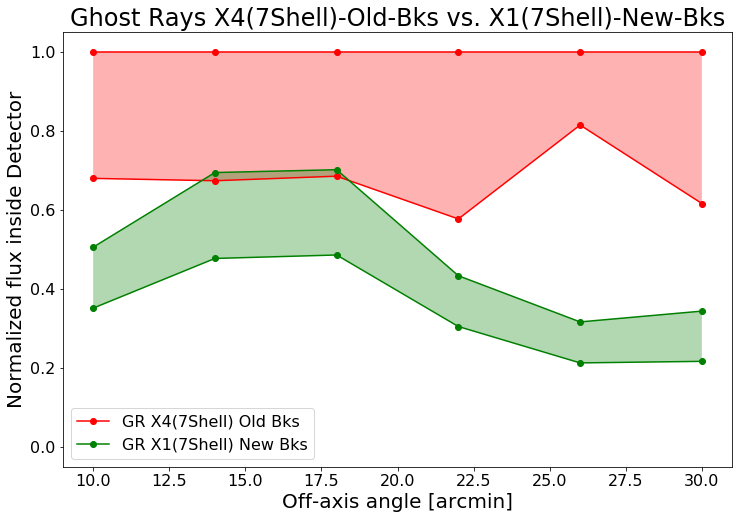

In [43]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,np.array(Flux_X4_up)/np.array(Flux_X4_up),'o-',c='r',label='GR X4(7Shell) Old Bks')
plt.fill_between(offaxis,np.array(Flux_X4_up)/np.array(Flux_X4_up),
                 np.array(Flux_X4_low)/np.array(Flux_X4_up),
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X4_low)/np.array(Flux_X4_up),'o-',c='r')
plt.plot(offaxis,np.array(Flux_X1_up)/np.array(Flux_X4_up),'o-',c='g',label='GR X1(7Shell) New Bks')
plt.fill_between(offaxis,np.array(Flux_X1_up)/np.array(Flux_X4_up),
                 np.array(Flux_X1_low)/np.array(Flux_X4_up),
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X1_low)/np.array(Flux_X4_up),'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Normalized flux inside Detector',fontsize=20)
plt.title('Ghost Rays X4(7Shell)-Old-Bks vs. X1(7Shell)-New-Bks',fontsize=24)
plt.ylim([-0.05,1.05])